In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Capgemini Internship

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from numpy import where
import numpy as np

In [ ]:
df = pd.read_csv("keystrokedynamicsdata.csv", header=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


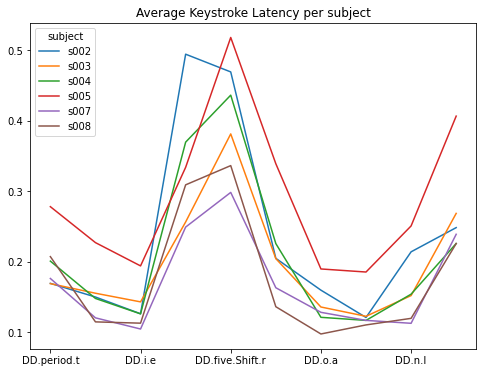

In [ ]:
DD = [dd for dd in df.columns if dd.startswith('DD')]
plot = df[DD]
plot['subject'] = df['subject'].values
plot = plot.groupby('subject').mean()
plot.iloc[:6].T.plot(figsize = (8,6), title= 'Average Keystroke Latency per subject')

In [ ]:
data_train, data_test = train_test_split(df, test_size = 0.5, random_state = 0)
X_train = data_train[df.columns[2:]]
y_train = data_train['subject']
X_test = data_test[df.columns[2:]]
y_test = data_test['subject']

In [ ]:
# K-Nearest Neighbor Classifier
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
knc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('K-Neaest Neighbor Classifier Accuracy: ', knc_accuracy)

K-Neaest Neighbor Classifier Accuracy:  0.27931372549019606


In [ ]:
# Multilayer perceptron Classifier

mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)
y_pred1 = mlpc.predict(X_test)
mlpc_accuracy = metrics.accuracy_score(y_test, y_pred)
print('Multi Layer Perceptron Classifier Accuracy: ', mlpc_accuracy)

Multi Layer Perceptron Classifier Accuracy:  0.27931372549019606


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'True')

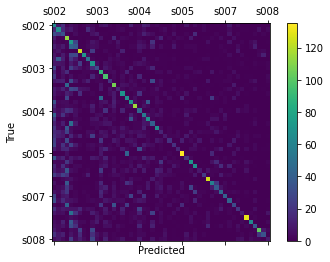

In [ ]:
# Draw confusion matrix for Multi Layer Perceptron results
from sklearn.metrics import confusion_matrix
labels = list(df['subject'].unique())
cm = confusion_matrix(y_test, y_pred, labels)
figure = plt.figure()
axes = figure.add_subplot(111)
figure.colorbar(axes.matshow(cm))
axes.set_xticklabels([''] + labels)
axes.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
df.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [ ]:
df1 = df.drop(['sessionIndex','rep'], axis=1)
df1.head()

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [ ]:
df1.describe()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
count,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000,20400.000000
mean,0.093379,0.264148,0.170769,0.085727,0.169085,0.083358,0.081565,0.159372,0.077806,0.089138,0.377434,0.288295,0.076904,0.438887,0.361983,0.095937,0.250921,0.154984,0.088354,0.156931,0.068577,0.106259,0.150670,0.044411,0.089899,0.202630,0.112731,0.095589,0.321847,0.226259,0.088306
std,0.029626,0.220534,0.226836,0.027424,0.123546,0.125755,0.026887,0.226928,0.228512,0.030635,0.265342,0.266695,0.021746,0.260343,0.260886,0.033900,0.174533,0.181619,0.026427,0.106557,0.108509,0.038828,0.107422,0.105197,0.030738,0.150191,0.159571,0.028348,0.225389,0.230759,0.027452
min,0.001400,0.018700,-0.235800,0.009300,0.001100,-0.162100,0.003200,0.001400,-0.160000,0.002100,0.001300,-0.150500,0.001400,0.169400,0.085600,0.001400,0.049400,-0.086500,0.006900,0.001200,-0.228700,0.004000,0.001100,-0.235500,0.003700,0.001300,-0.175800,0.003700,0.008300,-0.124500,0.002900
25%,0.074400,0.146900,0.049800,0.066000,0.113600,0.027200,0.062000,0.089300,0.007400,0.068600,0.216600,0.133200,0.061000,0.307900,0.229675,0.070200,0.156500,0.054700,0.071500,0.106400,0.017000,0.082100,0.096100,-0.009000,0.067300,0.127600,0.023500,0.077400,0.210000,0.114100,0.069900
50%,0.089500,0.205950,0.108700,0.081000,0.140400,0.057800,0.077100,0.120900,0.041200,0.083400,0.289000,0.200400,0.074200,0.377500,0.302000,0.093500,0.201350,0.102200,0.086300,0.131600,0.044400,0.101900,0.125000,0.022700,0.085300,0.172500,0.095500,0.093700,0.263000,0.160300,0.085500
75%,0.107900,0.306450,0.212400,0.099800,0.183900,0.096400,0.096900,0.173100,0.093400,0.102700,0.456850,0.369400,0.090600,0.486025,0.408900,0.116700,0.283425,0.191000,0.101900,0.167600,0.080300,0.122300,0.174600,0.068900,0.107900,0.228800,0.145700,0.111100,0.350200,0.255100,0.103700
max,0.376100,12.506100,12.451700,0.241100,4.919700,4.799900,0.331200,25.987300,25.915800,0.325400,4.961800,4.882700,0.198900,8.370200,8.290800,0.281700,4.152300,4.012000,0.687200,2.856700,2.815200,2.035300,3.327800,2.524200,0.357700,4.025200,3.978200,0.340700,5.883600,5.836400,0.265100


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df1['subject'].astype(str))
df1['subject'] = le.transform(df1['subject'].astype(str))

In [ ]:
df1

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,0,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,0,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,0,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,0,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,50,0.0884,0.0685,-0.0199,0.1095,0.1290,0.0195,0.0945,0.0757,-0.0188,0.1328,0.0826,-0.0502,0.1000,0.2398,0.1398,0.0863,0.2148,0.1285,0.0944,0.2066,0.1122,0.1219,0.1383,0.0164,0.0820,0.1329,0.0509,0.1005,0.2054,0.1049,0.1047
20396,50,0.0655,0.0630,-0.0025,0.0910,0.1148,0.0238,0.0916,0.0636,-0.0280,0.1256,0.0852,-0.0404,0.0987,0.2441,0.1454,0.0892,0.1209,0.0317,0.0776,0.0977,0.0201,0.1008,0.0512,-0.0496,0.1037,0.0868,-0.0169,0.1445,0.2206,0.0761,0.1198
20397,50,0.0939,0.1189,0.0250,0.1008,0.1122,0.0114,0.0721,0.0462,-0.0259,0.0903,0.2045,0.1142,0.0733,0.2190,0.1457,0.0742,0.1700,0.0958,0.0599,0.1104,0.0505,0.0913,0.1169,0.0256,0.0689,0.1311,0.0622,0.1034,0.2017,0.0983,0.0905
20398,50,0.0923,0.1294,0.0371,0.0913,0.0990,0.0077,0.0992,0.0897,-0.0095,0.1016,0.0570,-0.0446,0.0820,0.2881,0.2061,0.0729,0.1602,0.0873,0.0728,0.1111,0.0383,0.0882,0.0821,-0.0061,0.0576,0.0697,0.0121,0.0979,0.1917,0.0938,0.0931


In [ ]:
dftest = pd.read_csv("test.csv", header=0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le1.fit(dftest['subject'].astype(str))
dftest['subject'] = le1.transform(dftest['subject'].astype(str))

In [ ]:
dftest

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,0.136,0.849,0.713,0.143,0.751,0.608,0.304,0.240,-0.064,0.119,0.225,0.106,0.103,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151
1,0,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,0.175,0.505,0.330,0.134,0.614,0.480,0.336,0.265,-0.071,0.135,0.232,0.097,0.143,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127
2,0,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,0.127,0.296,0.169,0.087,0.377,0.290,0.206,0.151,-0.055,0.135,0.184,0.049,0.111,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087
3,0,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,0.143,0.312,0.169,0.087,0.351,0.264,0.216,0.153,-0.063,0.119,0.160,0.041,0.143,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119
4,0,0.135,0.424,0.289,0.110,0.184,0.074,0.127,0.296,0.169,0.127,0.272,0.145,0.087,0.263,0.176,0.232,0.185,-0.047,0.119,0.224,0.105,0.143,0.151,0.008,0.136,0.553,0.417,0.135,0.208,0.073,0.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0,0.128,0.232,0.104,0.080,0.176,0.096,0.104,0.200,0.096,0.144,0.257,0.113,0.086,0.358,0.272,0.177,0.146,-0.031,0.126,0.240,0.114,0.127,0.159,0.032,0.111,0.152,0.041,0.200,0.169,-0.031,0.118
159,0,0.111,0.192,0.081,0.095,0.224,0.129,0.087,0.192,0.105,0.135,0.280,0.145,0.111,0.487,0.376,0.208,0.177,-0.031,0.135,0.224,0.089,0.132,0.168,0.036,0.143,0.200,0.057,0.167,0.136,-0.031,0.127
160,0,0.127,0.240,0.113,0.103,0.224,0.121,0.119,0.192,0.073,0.151,0.264,0.113,0.111,0.343,0.232,0.208,0.177,-0.031,0.127,0.216,0.089,0.119,0.168,0.049,0.135,0.216,0.081,0.191,0.208,0.017,0.119
161,0,0.135,0.200,0.065,0.103,0.216,0.113,0.111,0.184,0.073,0.183,0.216,0.033,0.087,0.335,0.248,0.184,0.153,-0.031,0.135,0.216,0.081,0.127,0.168,0.041,0.143,0.192,0.049,0.183,0.144,-0.039,0.143


In [ ]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df1)
y_pred2 = model.predict(dftest)
y_pred2

array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
# filter outlier index
outlier_index = where(y_pred2 == -1) 
# filter outlier values
outlier_values = dftest.iloc[outlier_index]
outlier_values

,subject,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,0,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,0.136,0.849,0.713,0.143,0.751,0.608,0.304,0.240,-0.064,0.119,0.225,0.106,0.103,0.312,0.209,0.151,0.272,0.121,0.110,0.304,0.194,0.151
1,0,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,0.175,0.505,0.330,0.134,0.614,0.480,0.336,0.265,-0.071,0.135,0.232,0.097,0.143,0.297,0.154,0.150,0.263,0.113,0.127,0.304,0.177,0.127
2,0,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,0.127,0.296,0.169,0.087,0.377,0.290,0.206,0.151,-0.055,0.135,0.184,0.049,0.111,0.200,0.089,0.143,0.240,0.097,0.159,0.176,0.017,0.087
3,0,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,0.143,0.312,0.169,0.087,0.351,0.264,0.216,0.153,-0.063,0.119,0.160,0.041,0.143,0.184,0.041,0.151,0.224,0.073,0.206,0.192,-0.014,0.119
4,0,0.135,0.424,0.289,0.110,0.184,0.074,0.127,0.296,0.169,0.127,0.272,0.145,0.087,0.263,0.176,0.232,0.185,-0.047,0.119,0.224,0.105,0.143,0.151,0.008,0.136,0.553,0.417,0.135,0.208,0.073,0.095
5,0,0.087,0.144,0.057,0.095,0.135,0.040,0.088,0.120,0.032,0.097,0.273,0.176,0.096,0.248,0.152,0.215,0.136,-0.079,0.135,0.160,0.025,0.087,0.144,0.057,0.095,0.112,0.017,0.136,0.111,-0.025,0.104
152,0,0.111,0.192,0.081,0.111,0.192,0.081,0.103,0.240,0.137,0.159,0.272,0.113,0.087,0.535,0.448,0.232,0.169,-0.063,0.119,0.216,0.097,0.095,0.160,0.065,0.127,0.256,0.129,0.167,0.120,-0.047,0.135
153,0,0.119,0.232,0.113,0.095,0.192,0.097,0.087,0.208,0.121,0.151,0.232,0.081,0.087,0.327,0.240,0.184,0.153,-0.031,0.127,0.232,0.105,0.119,0.112,-0.007,0.143,0.176,0.033,0.161,0.160,-0.001,0.127
154,0,0.127,0.208,0.081,0.095,0.200,0.105,0.103,0.200,0.097,0.150,0.256,0.106,0.095,0.326,0.231,0.153,0.130,-0.023,0.119,0.312,0.193,0.103,0.144,0.041,0.103,0.192,0.089,0.143,0.184,0.041,0.111
155,0,0.127,0.224,0.097,0.087,0.184,0.097,0.095,0.192,0.097,0.127,0.232,0.105,0.087,0.383,0.296,0.168,0.137,-0.031,0.127,0.272,0.145,0.119,0.152,0.033,0.127,0.208,0.081,0.127,0.192,0.065,0.103


In [ ]:
outlier_values.shape

(17, 32)